In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go

In [108]:
pizza = pd.read_csv("https://raw.githubusercontent.com/f-imp/Principal-Component-Analysis-PCA-over-3-datasets/refs/heads/master/datasets/Pizza.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment',None)
np.set_printoptions(threshold=np.inf)

pizza[:5]

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [330]:
pizza["seggie"] = np.random.choice(["Whoop", "Hey", "Whee"], 300)

In [ ]:
def pull_categoricals(df):
    return [j for j in df.columns if "object" in str(df[j].dtype)]

categoricals = pull_categoricals(pizza)

In [ ]:
def pull_continuous(df, categoricals):
    return [j for j in pizza.columns if j not in categoricals]

continuous = pull_continuous(pizza, categoricals)

In [331]:
import warnings
warnings.filterwarnings("ignore")

def summary_dataframe_small(df):

	return pd.DataFrame({'features': df.columns,'dtypes': [df.dtypes[i] for i in range(len(df.columns))],
	'nulls':[df[df.columns[i]].isnull().sum() for i in range(len(df.columns))],'nonnuls / 1.0': (df.shape[0] - 
	df.isnull().sum().values) / df.shape[0],'uniques': [df[j].nunique() for j in df.columns]})

summary_dataframe_small(pizza)

,features,dtypes,nulls,nonnuls / 1.0,uniques
0,brand,object,0,1.0,10
1,id,int64,0,1.0,291
2,mois,float64,0,1.0,273
3,prot,float64,0,1.0,242
4,fat,float64,0,1.0,261
5,ash,float64,0,1.0,165
6,sodium,float64,0,1.0,84
7,carb,float64,0,1.0,277
8,cal,float64,0,1.0,142
9,seggie,object,0,1.0,3


In [332]:
# add in corr with dep?

def summary_dataframe_large(df):
    
    summary = pd.DataFrame({
        "feature": df.columns,
        "dtype" : [str(df[col].dtype) for col in df.columns],
        "nulls": [f"{df[col].isnull().sum()}" for col in df.columns],
        "nonnulls%": [f"{round(((1 - df[col].isnull().sum() / len(df)) * 100), 2)}%" for col in df.columns],
        "STATS": ["|" for col in df.columns],
        "min": [df[col].min().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " " for col in df.columns],
        "50%": [df[col].median().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " "
                for col in df.columns],
        "max": [df[col].max().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " " for col in df.columns],
        "stdev": [df[col].std().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " " for col in df.columns],
        "mean": [df[col].mean().round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else " " for col in df.columns],

        "skew": ["" if not any(t in str(df[col].dtype) for t in ("float", "int")) else "left" if df[col].median() > df[col].mean() else "right" if df[col].median() < df[col].mean() else "equal" for col in df.columns],
        "cat_mode": [" " if any(t in str(df[col].dtype) for t in ("float", "int")) else df[col].mode()[0] for col in df.columns],        
        "cat_mode": [" " if any(t in str(df[col].dtype) for t in ("float", "int")) else df[col].mode()[0] for col in df.columns],
        "COUNTS": ["|" for col in df.columns],
        "nuniques": [df[col].nunique() for col in df.columns],
        "vcs-": [df[col].value_counts().reset_index()["count"].min() for col in df.columns],
        "vcs+": [df[col].value_counts().reset_index()["count"].max() for col in df.columns],
        "RANDOM": ["|" for col in df.columns],
        "row[random]" :[df[col].iloc[np.random.randint(len(df))].round(2) if any(t in str(df[col].dtype) for t in ("float", "int")) else df[col].iloc[np.random.randint(len(df))] for col in df.columns],
    })

    return summary
    
summary = summary_dataframe_large(pizza)
summary

,feature,dtype,nulls,nonnulls%,STATS,min,50%,max,stdev,mean,skew,cat_mode,COUNTS,nuniques,vcs-,vcs+,RANDOM,row[random]
0,brand,object,0,100.0%,|,,,,,,,H,|,10,27,33,|,A
1,id,int64,0,100.0%,|,14003,24020.5,34045,6962.92,20841.04,left,,|,291,1,2,|,24138
2,mois,float64,0,100.0%,|,25.0,43.3,57.22,9.55,40.9,left,,|,273,1,4,|,28.64
3,prot,float64,0,100.0%,|,6.98,10.44,28.48,6.43,13.37,right,,|,242,1,4,|,10.46
4,fat,float64,0,100.0%,|,4.38,17.13,47.2,8.98,20.23,right,,|,261,1,3,|,14.06
5,ash,float64,0,100.0%,|,1.17,2.22,5.43,1.27,2.63,right,,|,165,1,12,|,5.43
6,sodium,float64,0,100.0%,|,0.25,0.49,1.79,0.37,0.67,right,,|,84,1,21,|,0.72
7,carb,float64,0,100.0%,|,0.51,23.24,48.64,18.03,22.86,left,,|,277,1,3,|,3.04
8,cal,float64,0,100.0%,|,2.18,3.22,5.08,0.62,3.27,right,,|,142,1,8,|,2.64
9,seggie,object,0,100.0%,|,,,,,,,Whee,|,3,82,122,|,Hey


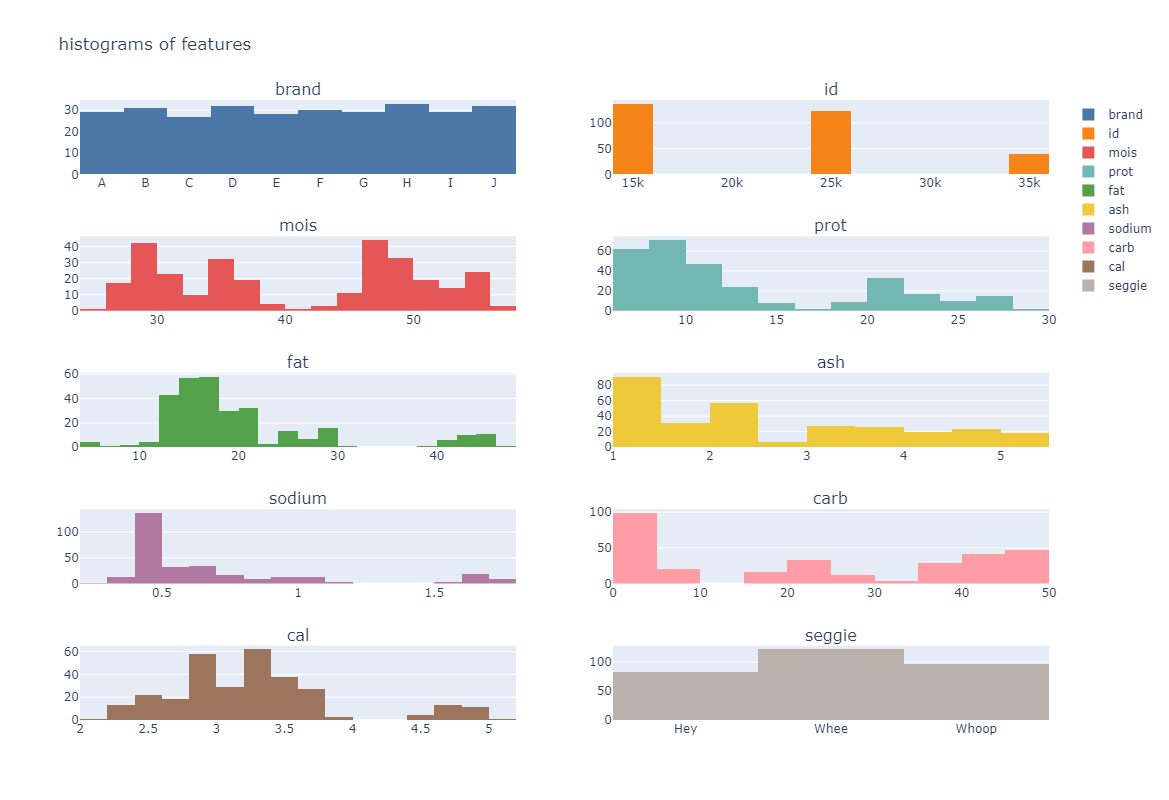

In [333]:
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot

from math import ceil
from itertools import cycle


def histogram_overview(df, max_cols=2):
    max_rows=ceil(float(len(df.columns)/max_cols))
    fig = make_subplots(
        rows=max_rows, 
        cols=max_cols,
        subplot_titles=df.columns,).update_layout(
        {"title":"histograms of features"})
    
    column_cyc = cycle(iter(range(1,max_cols+1)))
    color_list = cycle(iter(px.colors.qualitative.T10))
    row=1
    
    for j in df.columns:
        col = next(column_cyc)
        fig.add_histogram(
            x=df[j].values,
            row=row, 
            col=col, 
            name=j,
            marker={"color": next(color_list)}
            
        )
        if col % max_cols == 0:
            row+=1
        col+=1
        
    return fig.update_layout({"height": 800})

fig = histogram_overview(pizza)
fig

Categorical variables are ['brand', 'seggie'], dependent variable is [None]
colors used are ['#2B0910', '#CA9EBC', '#C5D9A9', '#F5F95A', '#3006D1', '#FE2FC3', '#38FDBC', '#05568E', '#434766', '#BC068C'] in iterator of unique length 10


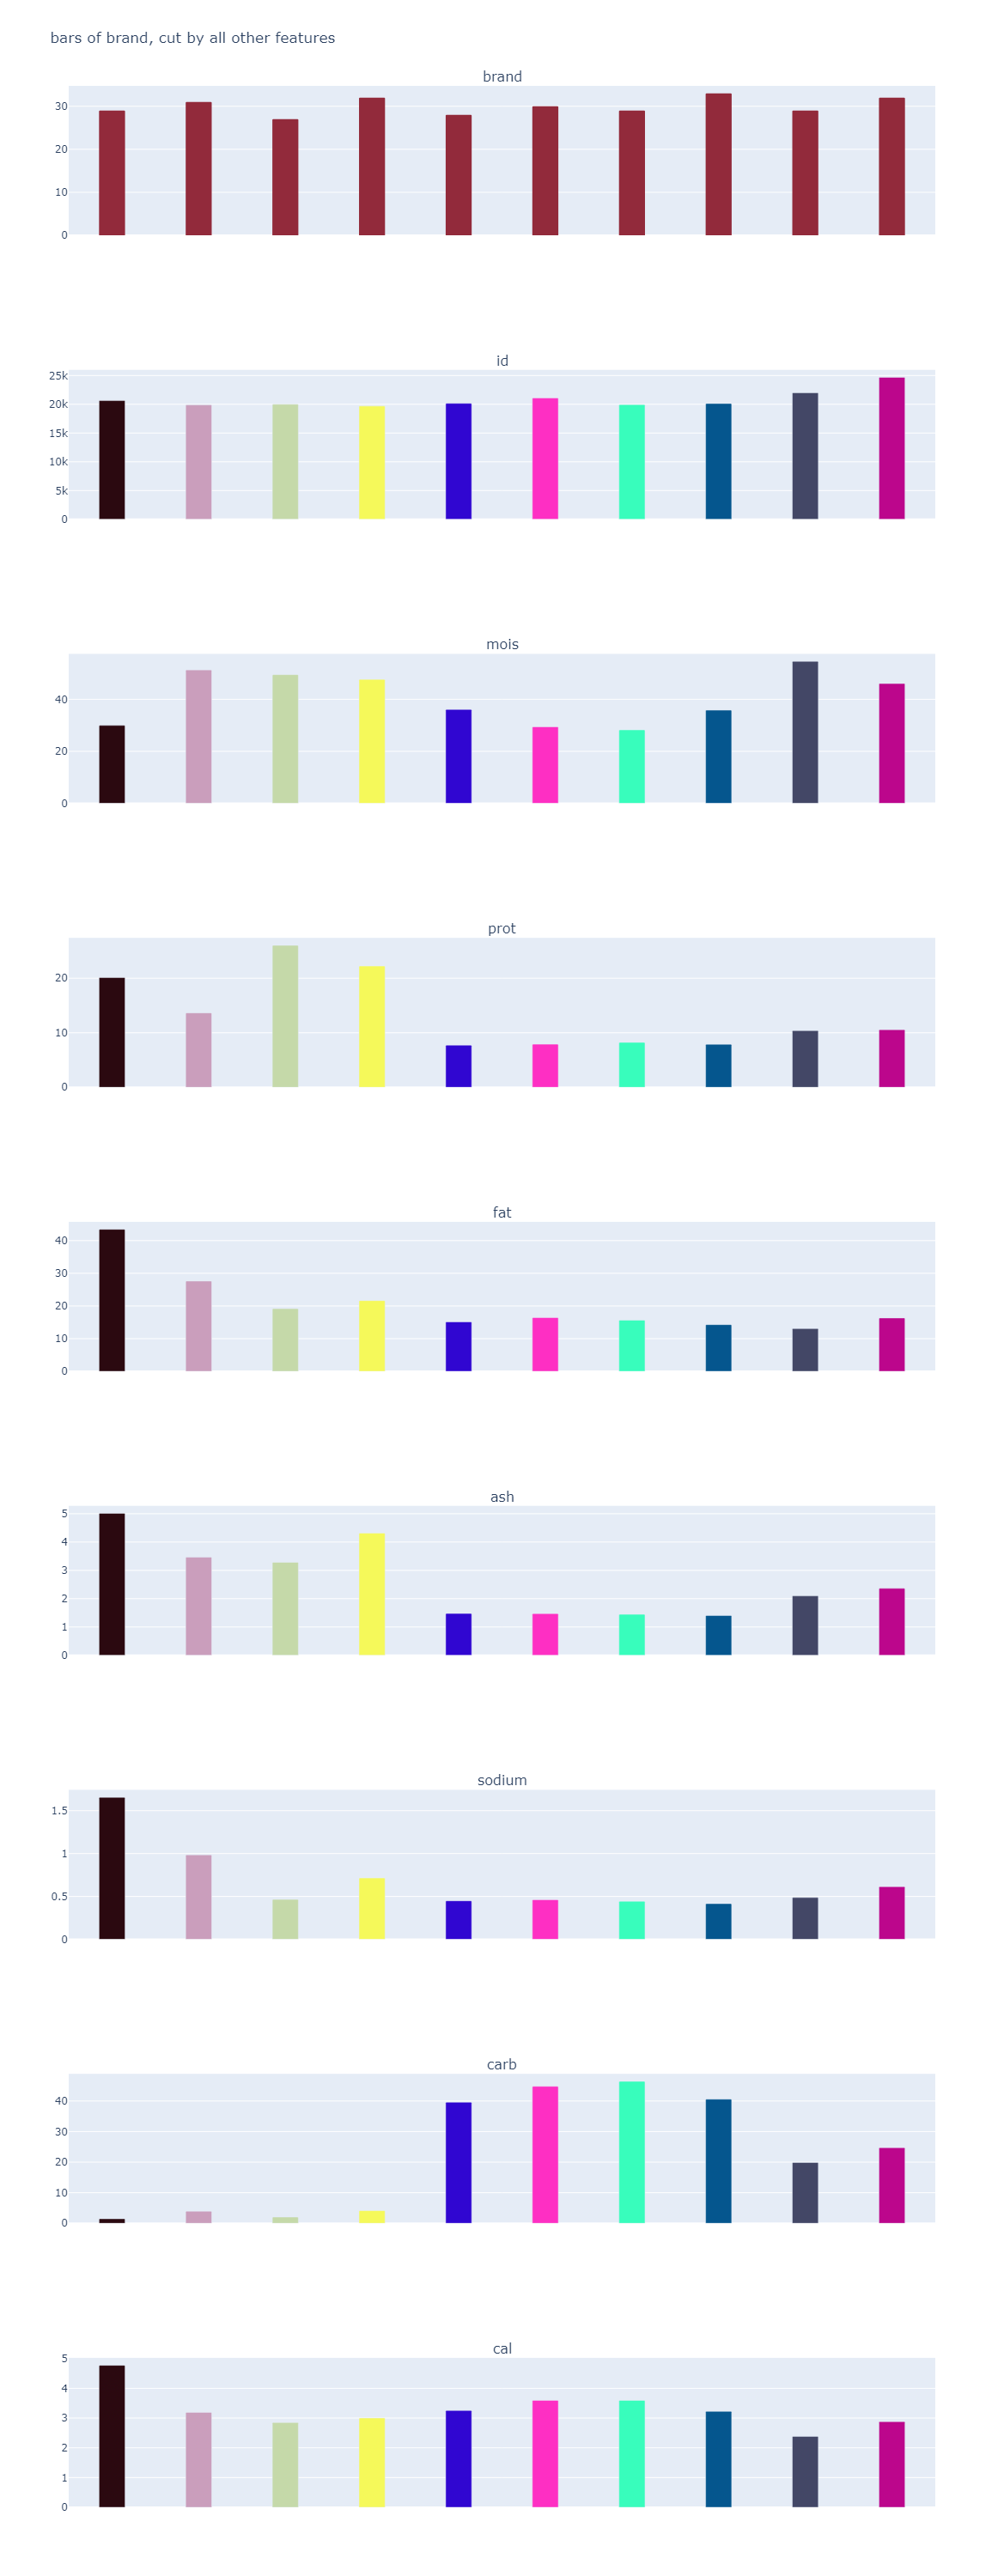

In [334]:
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import random
from math import ceil
from itertools import *



def continuous_charts_by_categorical_bars(df, categoricals, category, cont_dep=None, max_cols=4, height=500, xlabels=True):
    
    # bar charts of one categorical, measured by all other continuous variables.
    print(f"Categorical variables are {categoricals}, dependent variable is [{cont_dep}]")
    
    cs = [f for f in categoricals if f != category]
    df = df.drop(cs, axis=1)

    number_of_colors = len(df[category].unique())

    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]

    print(f"colors used are {colors} in iterator of unique length {len(colors)}")
    
    max_rows=ceil(float(len(df.columns))/max_cols)
    fig = make_subplots(
        rows=max_rows,
        cols=max_cols,
        subplot_titles=df.columns).update_layout(
        {"title":f"bars of {category}, cut by all other features"})

    
    col_cyc = cycle(iter(range(1,max_cols+1)))
    color_list = cycle(iter(colors))
    
    row=1
    ctr=0


    # print(df["
    
    for j in df.columns:
        col = next(col_cyc)
        for attr in df[category].unique():
            if j == category == cont_dep:
                fig.add_bar(
                    x = [attr],
                    y = [df[j][df[category]==attr].mean()],
                    row=row, 
                    col=col, 
                    name=j,
                    marker={"color": color[-1]},
                    showlegend=False
                ).update_xaxes(showticklabels=xlabels)
                
            
            elif j == category and j != cont_dep:
                if ctr < 1:
                    ctr += 1
                    fig.add_histogram(
                        x=df[j],
                        row=row,
                        col=col,
                        name=j,
                        marker={"color": color[-4]},
                        showlegend=False
                    ).update_xaxes(showticklabels=xlabels)
                else:
                    pass

            elif j == cont_dep and j != category:
                fig.add_bar(
                    x = [attr],
                    y = [df[j][df[category]==attr].mean()],
                    row=row, 
                    col=col, 
                    name=j,
                    marker={"color": color[-7]},
                    showlegend=False
                    
                ).update_xaxes(showticklabels=xlabels)

            else:
                fig.add_bar(
                    x = [attr],
                    y = [df[j][df[category]==attr].mean()],
                    row=row, 
                    col=col, 
                    name=j,
                    marker={"color": [next(color_list)]},
                    showlegend=False        
                ).update_xaxes(showticklabels=xlabels)
                

        if col % max_cols == 0:
            row+=1

    return fig.update_layout({"height": height,
                             "barcornerradius": 1,
                              "bargap":0.7
                             })

g = continuous_charts_by_categorical_bars(pizza, categoricals=categoricals, category="brand", cont_dep=None, max_cols=1, height=3000, xlabels=False)
g

10 10


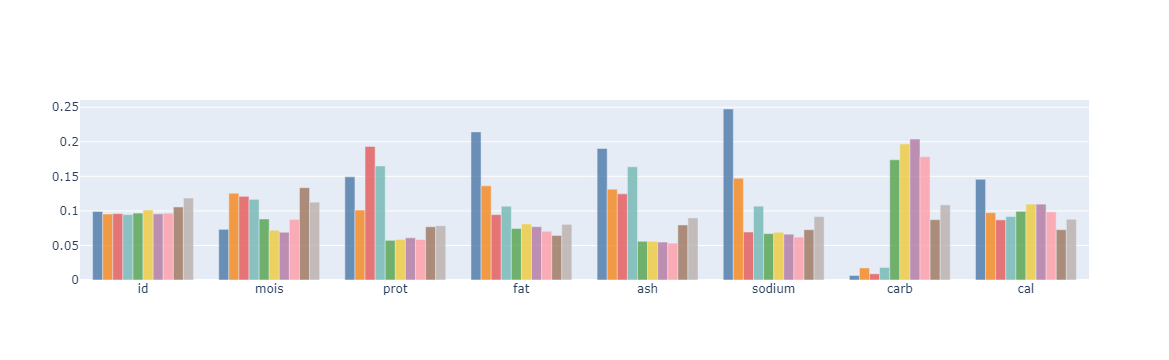

In [335]:

def bars_grouped_by_category(df, thecategory, continuous, colorscale):
    gb = df.groupby([thecategory])[continuous].mean()
    
    summit = gb.sum(axis=0)
    gb1 = gb / summit
    
    colors = cycle(iter(colorscale))
    
    figures = []
    
    for h in gb.index:
        mask = ( gb.index == h )
        gb2 = gb1[mask]
        x = gb2.columns.values
        y = gb2.values.flatten()
        fig = px.bar(x=x, y=y, opacity=0.8, hover_name=[h]*len(x)).update_traces({"marker" :{"color": next(colors)}})
        figures.append(fig.update_layout({"yaxis": {"showgrid": False}}))
    
    # datum = figures[0].data + figures[1].data
    # datum = figures[0].data + figures[1].data + figures[2].data
    # datum = figures[0].data + figures[1].data + figures[2].data + figures[3].data
    # datum = figures[0].data + figures[1].data + figures[2].data + figures[3].data + figures[4].data 
    # datum = figures[0].data + figures[1].data + figures[2].data + figures[3].data + figures[4].data + figures[5].data
    # datum = figures[0].data + figures[1].data + figures[2].data + figures[3].data + figures[4].data + figures[5].data + figures[6].data
    # datum = figures[0].data + figures[1].data + figures[2].data + figures[3].data + figures[4].data + figures[5].data + figures[6].data + figures[7].data 
    # datum = figures[0].data + figures[1].data + figures[2].data + figures[3].data + figures[4].data + figures[5].data + figures[6].data + figures[7].data + figures[8].data
    datum = figures[0].data + figures[1].data + figures[2].data + figures[3].data + figures[4].data + figures[5].data + figures[6].data + figures[7].data + figures[8].data + figures[9].data 
    
    print(len(datum), len(pizza["brand"].unique()))
    if len(datum) == len(df[thecategory].unique()):
        fig = go.Figure(datum)
        return fig
    else:
        print("the indices are of different lengths; brute force required, woe is me")


bars_grouped_by_category(pizza, "brand", continuous, px.colors.qualitative.T10)

features in this chart are:  ['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']


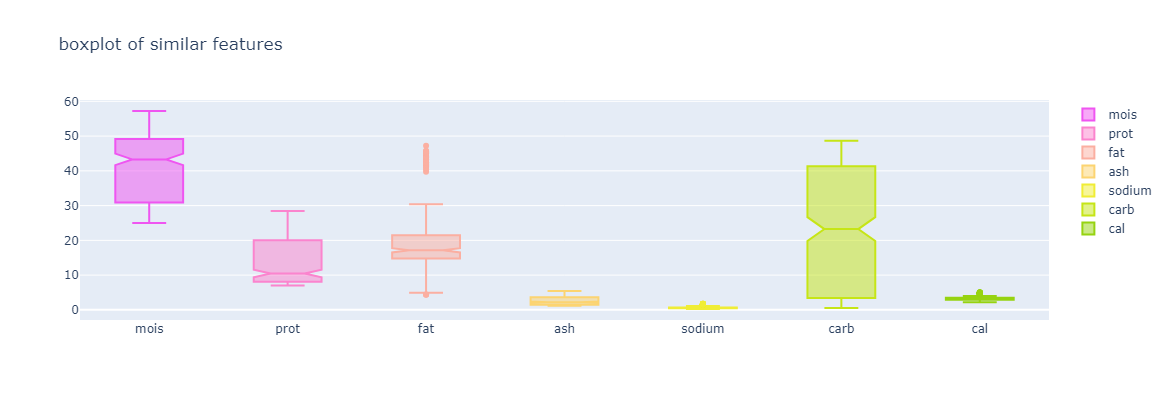

In [373]:
def box_similar(df, cols, colors=px.colors.qualitative.T10, height=400, width=1200):

    print("features in this chart are: ", cols)
    
    color_list = cycle(iter(colors))
    
    traces = []
    
    for j in cols:
        trace = go.Box(
            y=df[j],
            name=j,
            notched=True,
            marker={"color": next(color_list)}        
        )
        traces.append(trace)
    
    return go.Figure(traces).update_layout({"title": "boxplot of similar features", "height": height,"width": width})

box_similar(pizza, cols=[j for j in continuous if "id" not in j], colors=px.colors.cyclical.mygbm, height=400, width=1000)

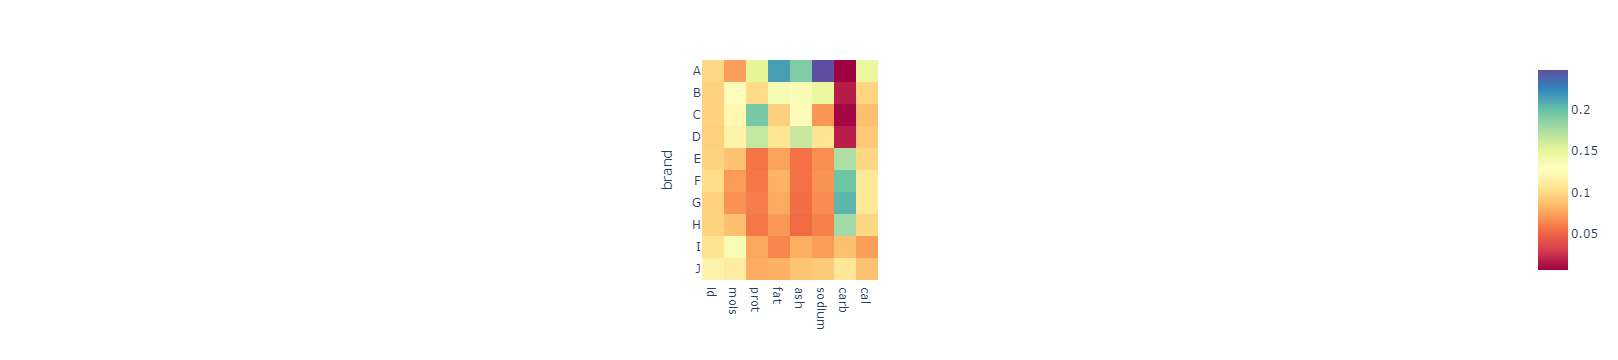

In [416]:
def heatmap_one_categorical(df, cat1):
    gb1 = pizza.groupby(["brand"]).mean(numeric_only=True)
    hmm = gb1.sum(axis=0)
    gb2 = gb1 / hmm
    gb2
    
    return px.imshow(gb2, color_continuous_scale="Spectral")

heatmap_one_categorical(pizza, "A")

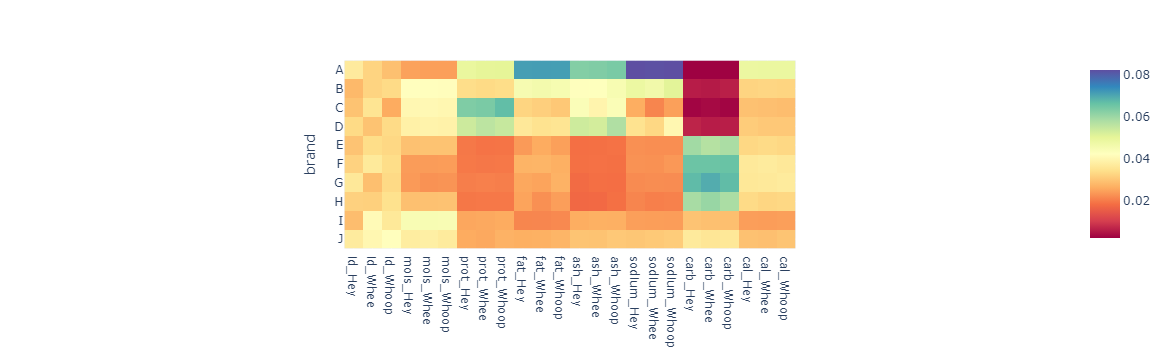

In [353]:
def two_categoricals_means(df, cat1, cat2, continuous=continuous):
    gb = pizza.groupby(["brand", "seggie"])[continuous].mean()
        
    summit = gb.sum(axis=0)
    gb1 = gb / summit
    
    gb2 = gb1.reset_index().pivot(index="brand", columns="seggie")
    gb2.columns = ["_".join(j) for j in gb2.columns]
    return px.imshow(gb2,  color_continuous_scale="Spectral")

two_categoricals_means(pizza, "brand", "seggie", continuous)

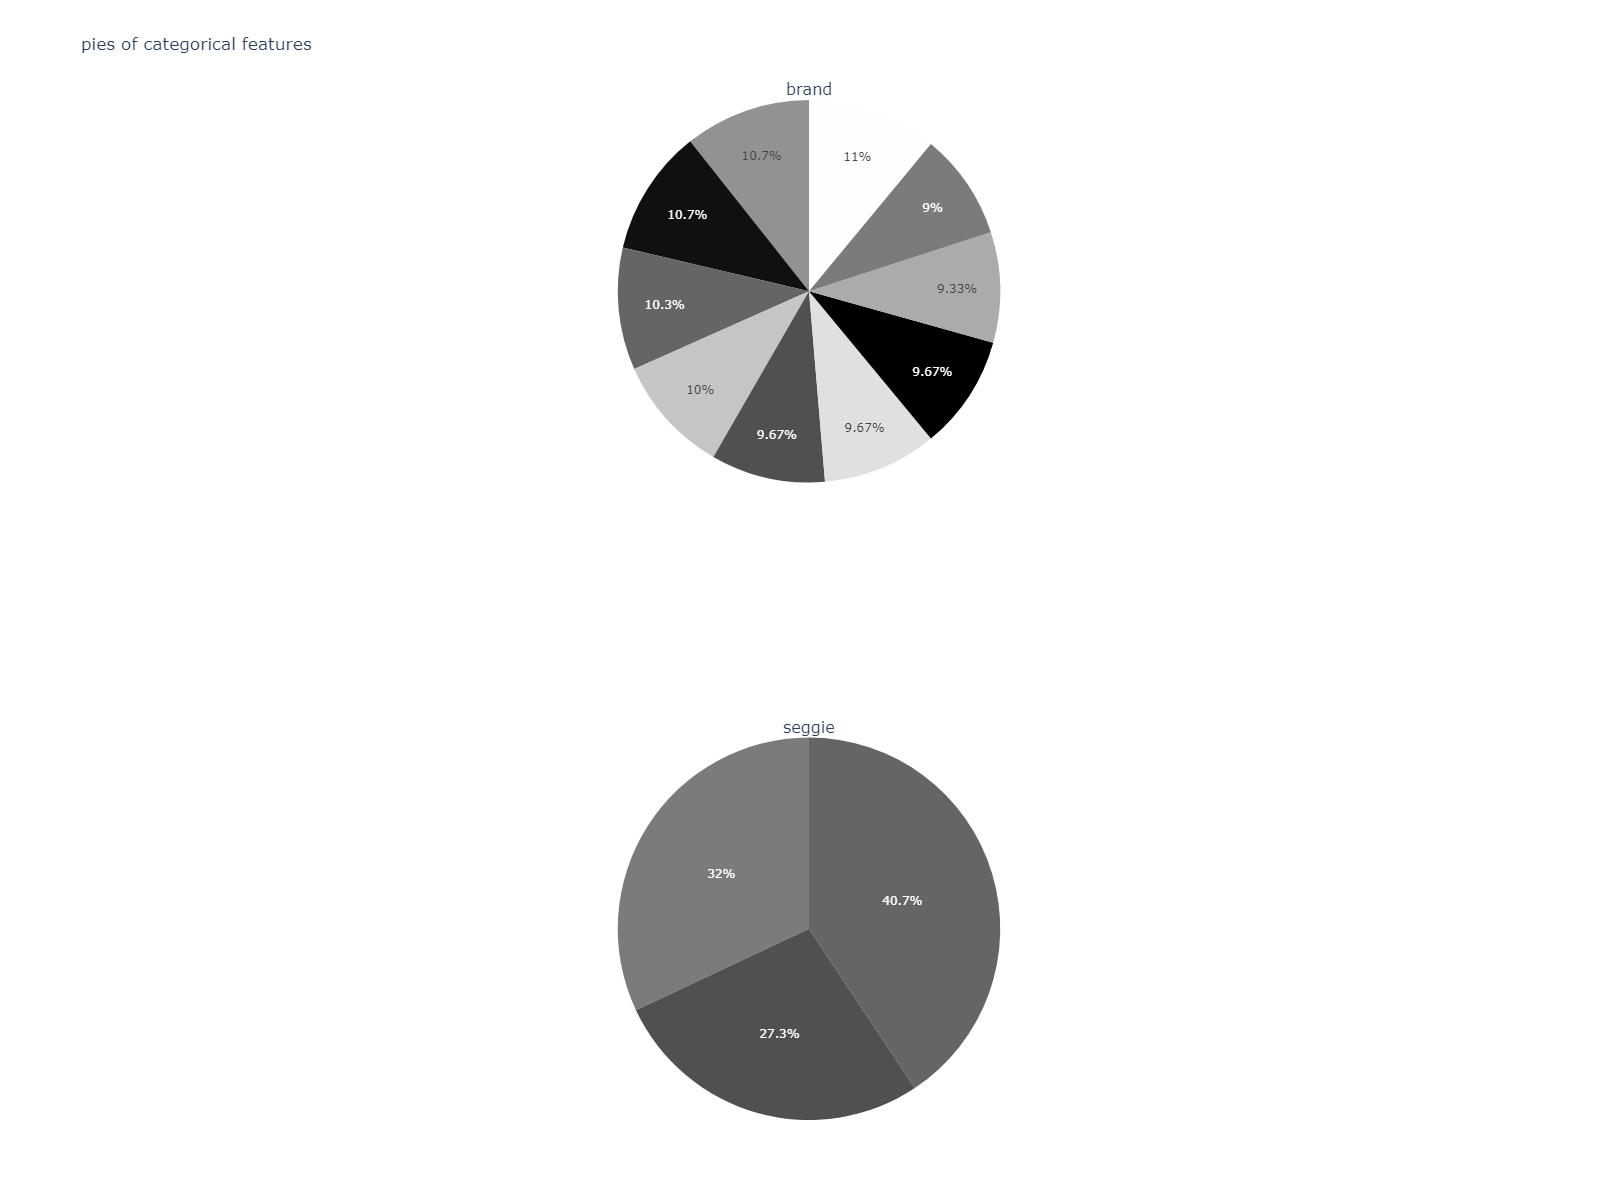

In [417]:
from plotly.subplots import make_subplots
from itertools import *
from math import ceil

# pie chart for categoricals
# MAX 100 COLUMNS
def pie_categoricals(df, categoricals, max_cols=6, height=1200, colorscale=px.colors.qualitative.T10):
    
    max_rows=ceil(float(len(df[categoricals].columns))/max_cols)
    
    fig = make_subplots(
        rows=max_rows,
        cols=max_cols,
        specs=[
            [{"type":"pie"} for h in range(max_cols)] for j in range(max_rows)       
              ],
    
        subplot_titles=df[categoricals].columns
    ).update_layout(
        {"title":f"pies of categorical features"})

    pies = [df.groupby(j).count().iloc[::, 0].reset_index().rename(columns={str(df.columns[0]):"count"}) for j in categoricals]

    row=1

    pies = [df.groupby(j).count().iloc[::, 0].reset_index().rename(columns={str(df.columns[0]):"count"}) for j in categoricals]

    col_cyc = cycle(iter(range(1,max_cols+1)))
    color_cyc = cycle(iter(colorscale))

    for j in range(len(pies)):
        colors = list(islice(color_cyc, 0, 100))
        col = next(col_cyc)
        fig.add_pie(
            labels=pies[j].iloc[::, 0].values,
            values=pies[j].iloc[::, 1].values,
            row=row, col=col,
            showlegend=False,
            name=categoricals[j],
        ).update_traces(marker={"colors": colors}, textposition="inside")
        if col % max_cols == 0:
            row+=1    
    
    return fig.update_layout({"height": height, "width":1100})

fig = pie_categoricals(pizza, categoricals, max_cols=1, height=1200, colorscale=px.colors.sequential.gray)
#update inside

fig

In [78]:
def scatters_continuous(df, categoricals, color=None, opacity=0.5, max_cols=4, height=2000, colorscale=px.colors.qualitative.T10):

    print(f"All features listed are {df.columns}, \n categoricals are [{categoricals}], \n continuous are {[j for j in df.columns if j not in categoricals]}")

    # df = df.drop(categoricals, axis=1)


    check_list1 = []
    for j in df.columns:
        for h in df.columns:
            if j != h:
                if (j, h) not in check_list1:
                    if (h, j) not in check_list1:
                        check_list1.append((j, h))    
    
    max_rows=ceil(float(len(check_list1))/max_cols)
        
    fig = make_subplots(
        rows=max_rows,
        cols=max_cols,
        subplot_titles=[", ".join([q, a]) for (q, a) in check_list1]
    )
    
    col_cyc = cycle(iter(range(1,max_cols+1)))
    color_cyc = cycle(iter(colorscale))
    
    row=1
    r = 0

    # comment this out if colors are None
    a = pizza["brand"].unique()
    color_list = list(islice((color_cycle), len(a)))
    colors_dict = dict(zip(a, color_list))
    # comment this out if colors are None
    # then replace marker colors with "maroon"
    
    check_list2 = []
    for j in df.columns:
        for h in df.columns:
            if j != h:
                if (j, h) not in check_list2:
                    if (h, j) not in check_list2:
                        check_list2.append((h, j))
                        col = next(col_cyc)
                        fig.add_scatter(
                            x=df[j], 
                            y=df[h], 
                            row=row, 
                            col=col,
                            showlegend=False,
                            name=", ".join([str(j), str(h)]),
                            mode="markers",
                            marker={"color": df[color].apply(lambda x: colors_dict[x]), "opacity": opacity}
                        ).update_layout({"title": f"{j} by {h}", 
                                        "xaxis": {"title": j},
                                        "yaxis": {"title": h}})
                        r +=1
        
                        if col % max_cols == 0:
                            row+=1

    return fig.update_layout({"title": f"scatter plots, all features by all features", "height": max_rows*300, "width":1000}), check_list1

fig, check_list1 = scatters_continuous(pizza, categoricals, opacity=0.1, color="brand", max_cols=2, colorscale=px.colors.qualitative.T10)

All features listed are Index(['brand', 'id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'], dtype='object'), 
 categoricals are [['brand']], 
 continuous are ['id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']


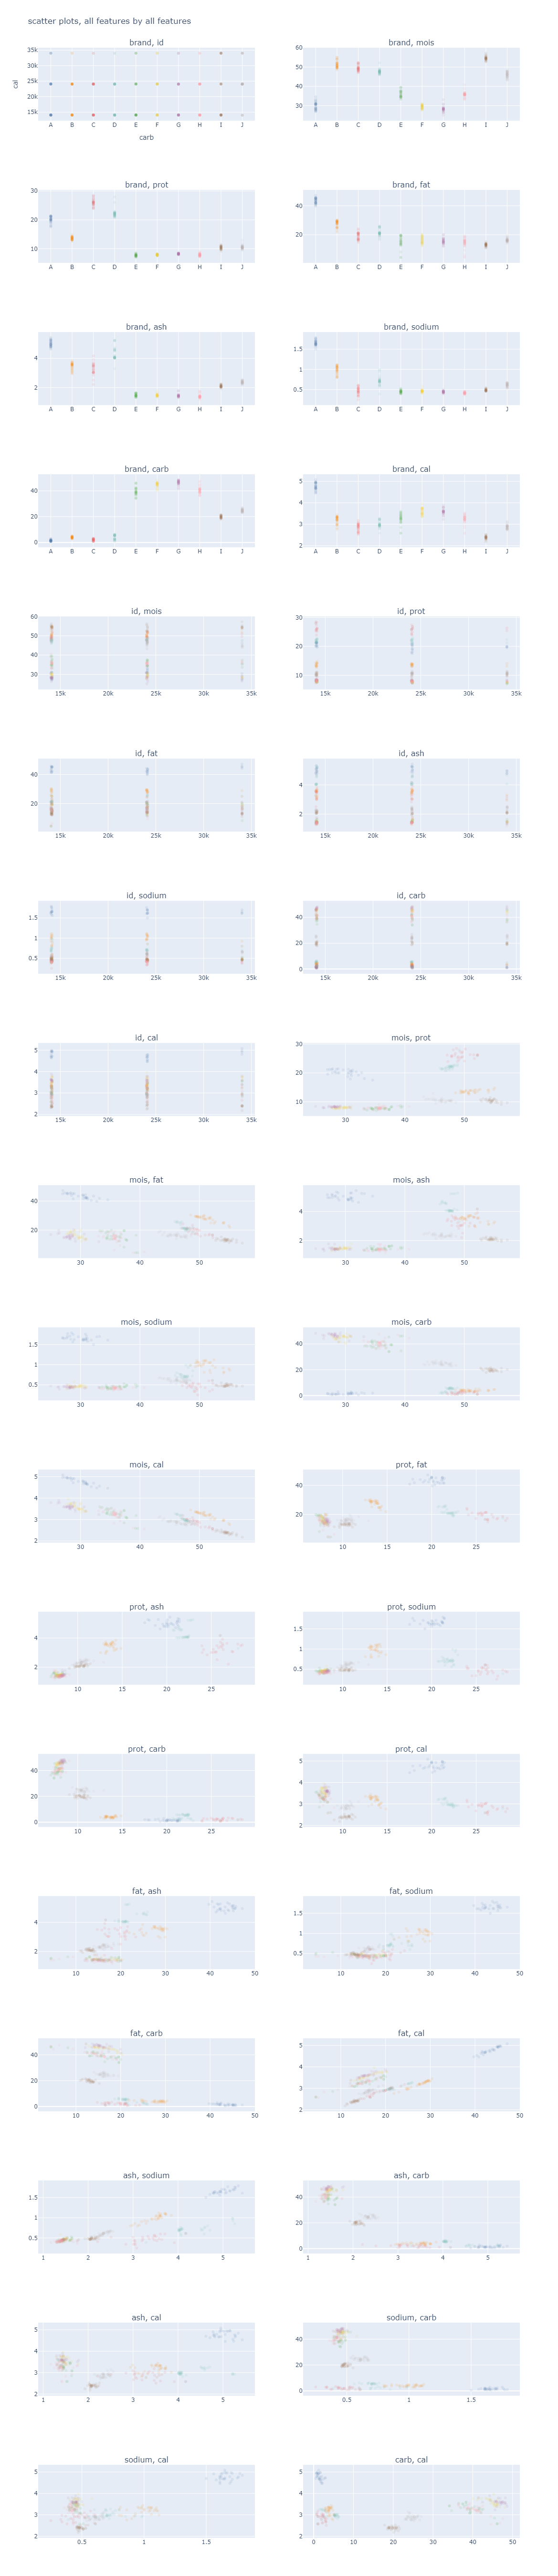

In [79]:
fig

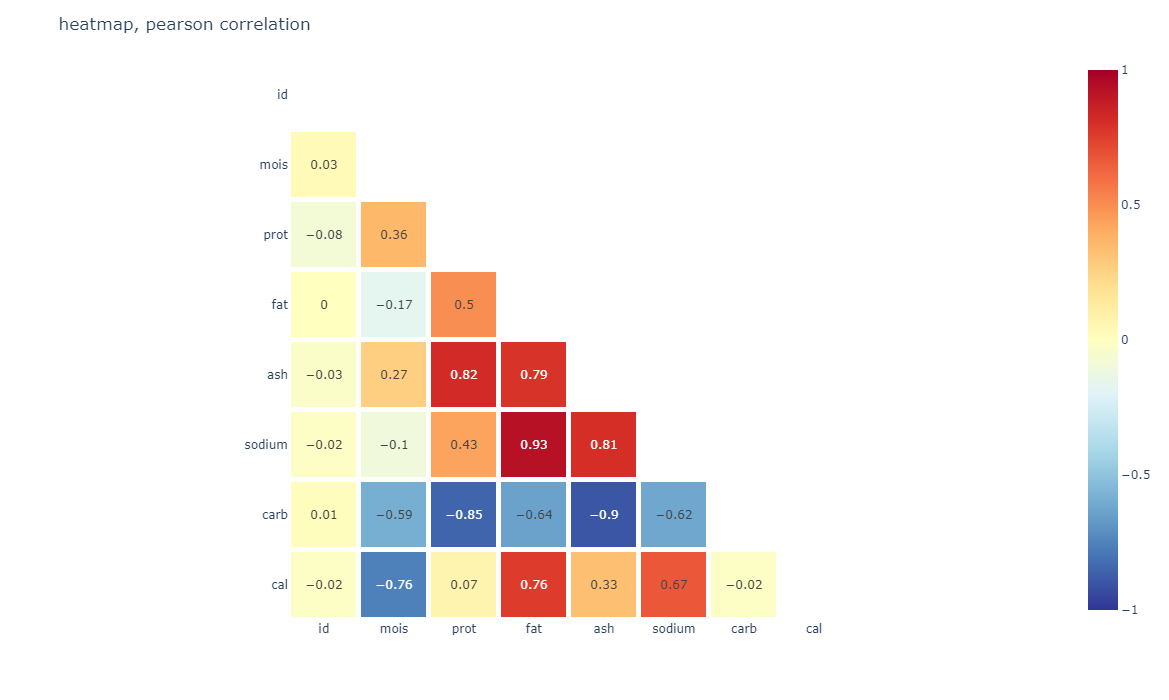

In [377]:
def heatmap_allfeatures_pearson(df, height=800, colors="Oryel"):

    df = df.select_dtypes(["number"])

    corr = df.corr().round(2)
    mask = np.zeros_like(df.corr(), dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    corr = corr.mask(mask)

    g = px.imshow(corr, text_auto=True, color_continuous_scale=colors, zmin=-1, zmax=1)

    g.update_layout(
    { "template": "plotly_white",
     "title": "heatmap, pearson correlation",
    "xaxis":{"showgrid": False,
             "zeroline": False},
    "yaxis": {"showgrid": False,
             "zeroline": False},
     "height": height,
   }).update_traces(xgap=5,ygap=5)

    return g, corr

fig, corr = heatmap_allfeatures_pearson(pizza, height=700, colors="RdYlBu_r")
fig


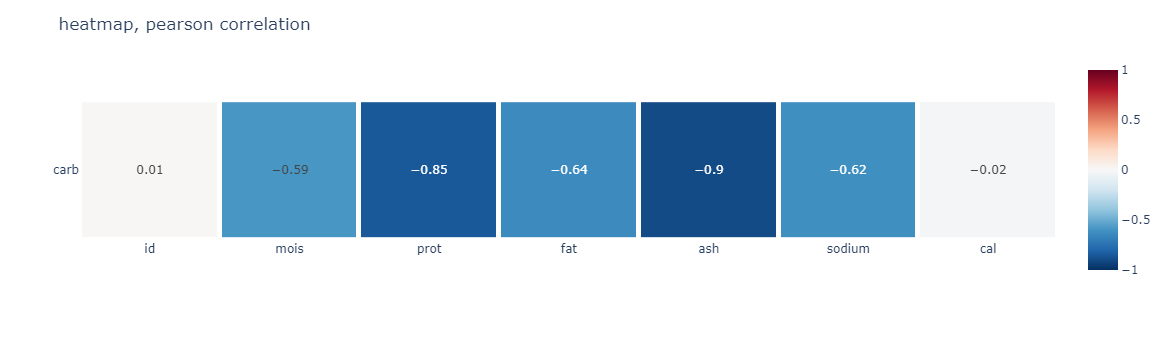

In [382]:
def heatmap_pearson_onefeature(df, dep):

    df = df.select_dtypes(["number"])

    corr = df.corr().round(2)
    corr = corr[[dep]].drop([dep], axis=0).T

    g = px.imshow(corr, text_auto=True, color_continuous_scale="RdBu_r", zmin=-1, zmax=1)

    g.update_layout(
    { "template": "plotly_white",
     "title": "heatmap, pearson correlation",
    "xaxis":{"showgrid": False,
             "zeroline": False},
    "yaxis": {"showgrid": False,
             "zeroline": False}
   }).update_traces(xgap=5,ygap=5)
    return g, corr

fig, corr= heatmap_pearson_onefeature(pizza, dep="carb")
fig